# CHAPTER 04 : 분류
## 01 분류(Classification)의 개요

**지도학습(Supervised Learning) : Label, 즉 명시적 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝**
> 분류(Classification) : 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것
>     
> - Naive-Bayes : 베이즈(Bayes) 통계와 생성 모델에 기반
> - Logistic Regression : 독립변수와 종속변수의 선형 관계성에 기반
> - Decision Tree : 데이터 균일도에 따른 규칙 기반
> - Support Vector Machine(SVM) : 개별 클래스 간 최대 분류 마진을 효과적으로 찾아줌
> - Nearest Neighbor : 근접 거리를 기준으로 하는 최소 근접 알고리즘
> - Neural Network : 심층 연결 기반
> - Ensemble : 서로 다른(또는 같은) 머신러닝 알고리즘을 결합 - 일반적으로 결정 트리를 기본 알고리즘으로 사용

**Ensemble은 매우 높은 예측 성능으로 애용되므로, 본 챕터에서 집중 활용**
> Ensemble 종류와 특징
> 
> - Bagging 방식 : Random Forest로 대표되며, 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성이 특징
> - Boosting 방식 : Gradient Boosting에서 XgBoost, LightGBM 등을 거치며 성능 발전. 정형 데이터 분류 영역에서 가장 높은 활용도.
> 앙상블은 매우 많은 여러 개의 약한 학습기(성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 업데이트하며 예측 성능을 향상시키는데, 결정 트리가 약한 학습기의 좋은 예

## 02 결정 트리(Decision Tree)
> **결정 트리의 구조**
>
> - 루트 노드(Root Node) > 규칙 노드(Decision Node) > 리프 노드(Leaf Node)로 구성되며, 새로운 규칙 조건마다 Sub Tree 생성
> - 규칙이 너무 많으면 분류를 결정하는 방식이 복잡하다는 의미이며, 과적합(Overfitting)이 발생해 예측 성능이 저하될 수 있다.
> - 가능한 적은 결정 노드로 높은 예측 정확도를 가지려면, 최대한 많은 데이터 세트가 분류에 속할 수 있도록 규칙을 정해야 한다.(Split)
> - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.
> - 정보 균일도를 측정하는 방법 : 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수(DecisionTreeClassifier에서 사용)


> **결정 트리 모델의 특징**
>
> - 균일도를 기반으로 하고 있어서, 알고리즘이 쉽고 직관적이다. (특별한 경우를 제외하면 각 피처의 스케일링과 정규화 같은 전처리 불필요)
> - 단점 : 과적합으로 정확도가 떨어지기 쉽다. (서브 트리를 계속 만듦으로써 피처/균일도가 다양해지고, 결국 트리 깊이와 복잡도 상승)
> - 위 단점을 극복하기 위해 트리 크기를 사전에 제한하는 튜닝이 필요하다.
> - 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반으로, 분류와 회귀 모두 사용할 수 있다.

> **결정 트리 파라미터**
>
> - min_samples_split : 노드 분할을 위한 최소한의 샘플 데이터 수. (과적합 제어에 사용, Default=2. 작을 수록 분할 노드가 많아져 과적합 가능성이 증가한다.)
> - min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수. (비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정)
> - max_features : 최적 분할을 위해 고려할 최대 피처 개수. (Default=None, int형으로 지정하면 대상 피처 개수, float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트.
> - max_depth : 트리의 최대 깊이. (Default=None)
> - max_leaf_nodes : 말단 노드의 최대 개수

> **결정 트리 모델의 시각화**
> 
> - Graphviz 패키지 > export_graphviz() API

In [2]:
# 붓꽃 데이터 세트를 활용한 DecisionTreeClassifier 시각화
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터 로딩, 학습/테스트 데이터 세트 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
               feature_names = iris_data.feature_names, impurity=True, filled=True)

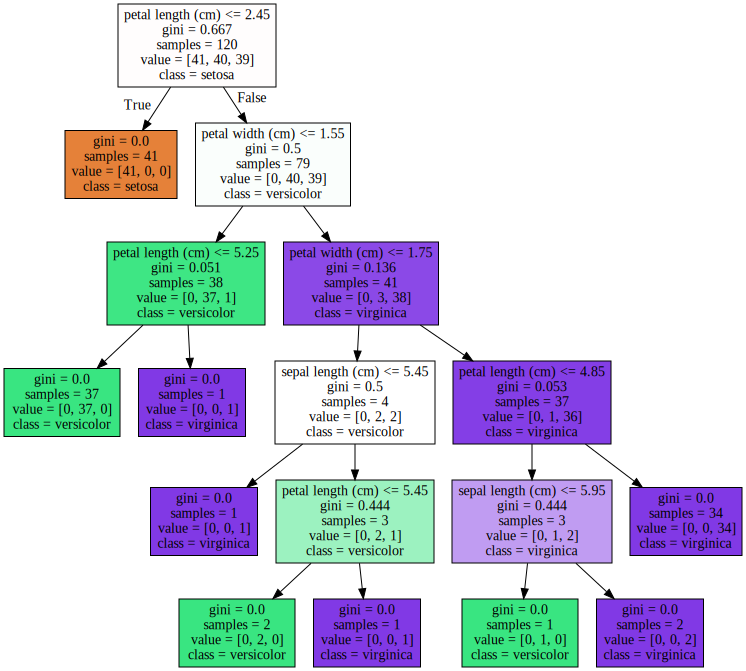

In [4]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

> 해석
> - 리프 노드 : 더 이상 자식 노드가 없는 노드. 최종 클래스(레이블) 값이 결정되는 노드로, 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 된다.
> - 브랜치 노드 : 자식 노드가 있는 노드. 자식 노드를 만들기 위한 분할 조건을 갖는다. 
>
> 노드 내에 기술된 지표의 의미 (예시)
> - petal length (cm) <= 5.45 : 자식 노드를 만들기 위한 규칙 조건. petal length가 5.45cm 이하일 것.
> - gini = 0.444 : 아래 value=[]로 주어진 데이터 분포의 지니 계수가 0.444 (단일 클래스로 데이터 구성 시 지니 계수는 0)
> - samples = 3 : 현 규칙에 해당하는 데이터 건수 = 3건
> - value = [0,2,1] : 클래스 값 기반의 데이터 건수. Setosa 0개, Versicolor 2개, Virginica 1개로 데이터가 구성됨을 의미

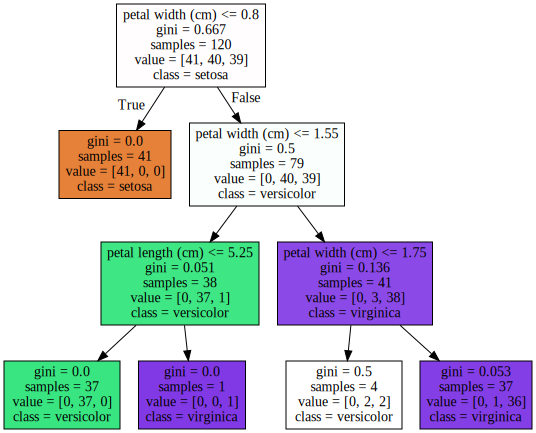

In [5]:
# parameter 변경해보기 - max_depth

dt_clf2 = DecisionTreeClassifier(max_depth=3)
dt_clf2.fit(X_train, y_train)
export_graphviz(dt_clf2, out_file="tree2.dot", class_names = iris_data.target_names, 
               feature_names = iris_data.feature_names, impurity=True, filled=True)
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

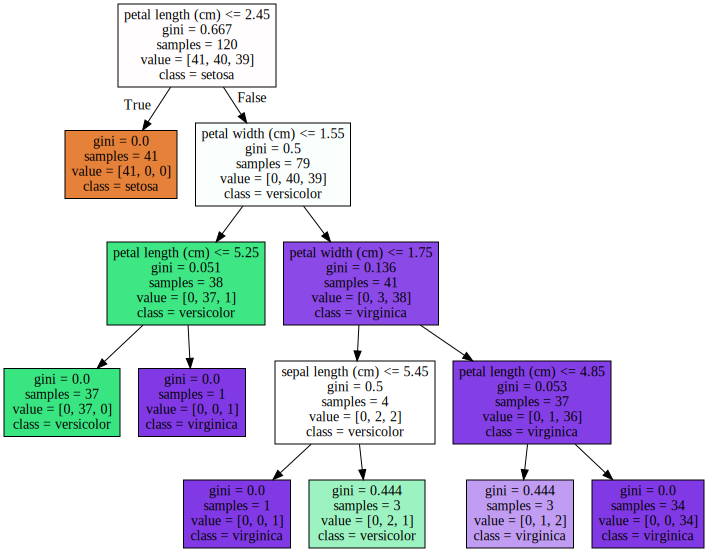

In [6]:
# parameter 변경해보기 - min_samples_split

dt_clf3 = DecisionTreeClassifier(min_samples_split=4)
dt_clf3.fit(X_train, y_train)
export_graphviz(dt_clf3, out_file="tree3.dot", class_names = iris_data.target_names, 
               feature_names = iris_data.feature_names, impurity=True, filled=True)
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

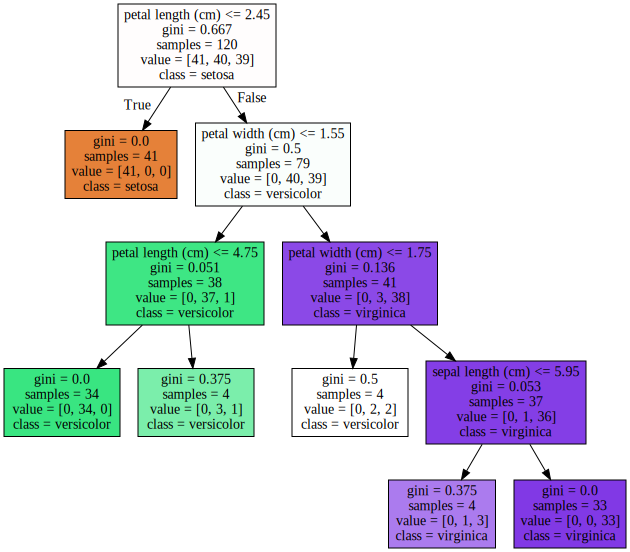

In [8]:
# parameter 변경해보기

dt_clf4 = DecisionTreeClassifier(min_samples_leaf=4)
dt_clf4.fit(X_train, y_train)
export_graphviz(dt_clf4, out_file="tree4.dot", class_names = iris_data.target_names, 
               feature_names = iris_data.feature_names, impurity=True, filled=True)
with open("tree4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

> 결정 트리에서는 균일도에 기반해 어떤 속성을 규칙 조건으로 선택하느냐가 중요한 요건
> - 중요한 몇 개 피처가 명확한 트리 규칙을 만드는 데 기여하며, 모델을 더 간결하고 이상치에 강하게 만들 수 있다.

**feature_importances_** : 피처별 중요도를 확인하는 방법. ndarray 형태로 값을 반환하며, 피처 순서대로 값이 할당된다.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

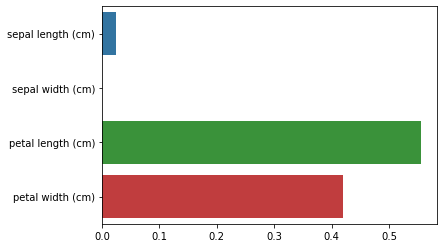

In [12]:
import seaborn as sns
import numpy as np
%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 image 표시

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

> 해석 : petal_length > petal_width > sepal_length 순으로 중요도가 높은 피처

**결정 트리 과적합(Overfitting)**
- make_classification() : '분류'를 위한 임의의 테스트용 데이터를 만들어주는 함수

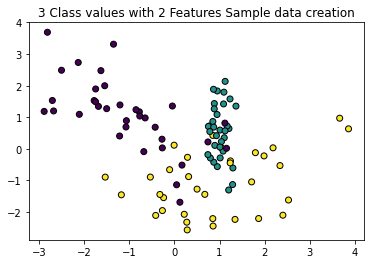

In [14]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처를 2차원 좌표 시각화. 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, edgecolor='k')

> 해석 :
> 3개의 색깔 구분 - 클래스 값에 따른 구분

- visualize_boundary() : 머신러닝 모델의 클래스 값 예측 기준을 색상 경계로 표현해 주는 유용 함수

In [16]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

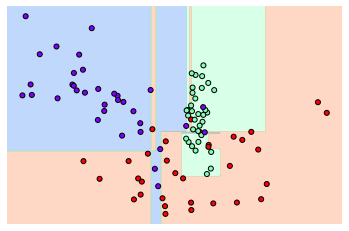

In [17]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

> 해석 : 일부 이상치 고려로 인해 분할이 많이 일어나, 결정 기준 경계가 많아졌다.

- min_samples_leaf = 6을 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 규칙 완화

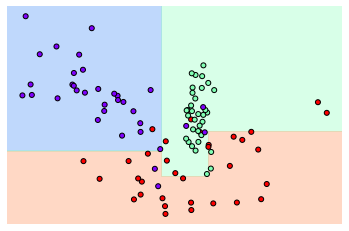

In [18]:
# min_samples_leaf = 6 으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

**결정 트리 실습 - 사용자 행동 인식 데이터 세트**